In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

# Read .csv file

In [2]:
df = pd.read_csv('testset.csv') #df = pd.read_csv("/kaggle/input/delhi-weather-data/testset.csv") sourse from where I bring data
df.head() # with default header

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Time as a index and Temp

In [3]:
df.set_index(['datetime_utc'], inplace=True)
df.head(2)

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN


# Fatch only 2 set time & temp

In [4]:
# taking only temperature feature as values and datetime feature as index in the dataframe 
df = pd.read_csv('testset.csv')
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])
data.head(4)

,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0


# Group (month by month) and (year by year)

In [5]:
df = pd.read_csv('testset.csv')
df = pd.read_csv("testset.csv", parse_dates= ["datetime_utc"]) # cleen the date as per requrement
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])  # taking only temperature feature as values and datetime feature as index in the dataframe 
data.head(4)

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0


In [6]:
# resampling data with date frequency (month by month)
avg_month = data.resample('m').mean()
avg_month.head(4)

,temp
datetime_utc,
1996-11-30,19.438944
1996-12-31,13.816794
1997-01-31,12.871118
1997-02-28,15.778777


In [7]:
# resampling data with date frequency (year by year)
avg_year = data.resample('y').mean()
avg_year.head(4)

,temp
datetime_utc,
1996-12-31,16.518636
1997-12-31,24.444635
1998-12-31,24.847371
1999-12-31,27.335731


In [8]:
# resampling data with date frequency (year by year)
avg_year = avg_month.resample('y').mean()    # This and above are same result but this reduce timecomplexicity 
avg_year.head(4)

,temp
datetime_utc,
1996-12-31,16.627869
1997-12-31,23.794779
1998-12-31,24.381696
1999-12-31,26.046676


In [9]:
# y = avg_year['1997-12-31':'2016-12-31']   # slicing
y = avg_year['1998':'2002']
y

,temp
datetime_utc,
1998-12-31,24.381696
1999-12-31,26.046676
2000-12-31,25.541391
2001-12-31,25.552616
2002-12-31,26.472596


In [10]:
# y = avg_year['1997-12-31':'2016-12-31': Gap]   # 
y = avg_year['1998':'2010':4]
y

,temp
datetime_utc,
1998-12-31,24.381696
2002-12-31,26.472596
2006-12-31,25.400513
2010-12-31,25.604612


# Bar graph (Temp v/s Months)

<Axes: xlabel='datetime_utc', ylabel='temp'>

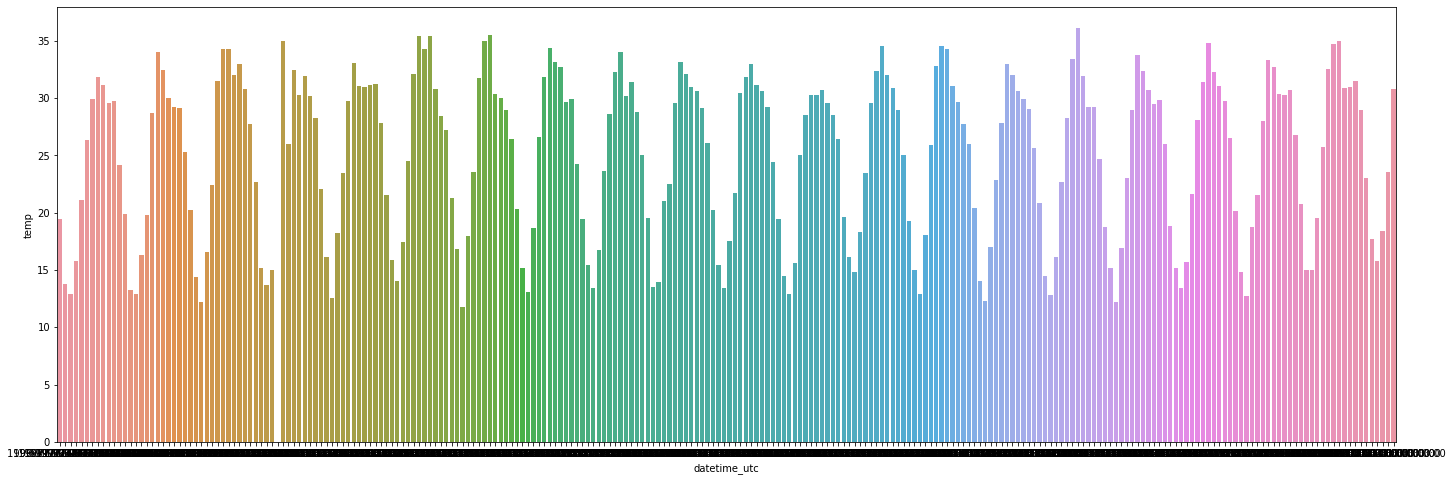

In [11]:
plt.figure(figsize= (24,8))
sns.barplot(x=avg_month.index, y=avg_month['temp'])

<Axes: xlabel='datetime_utc', ylabel='temp'>

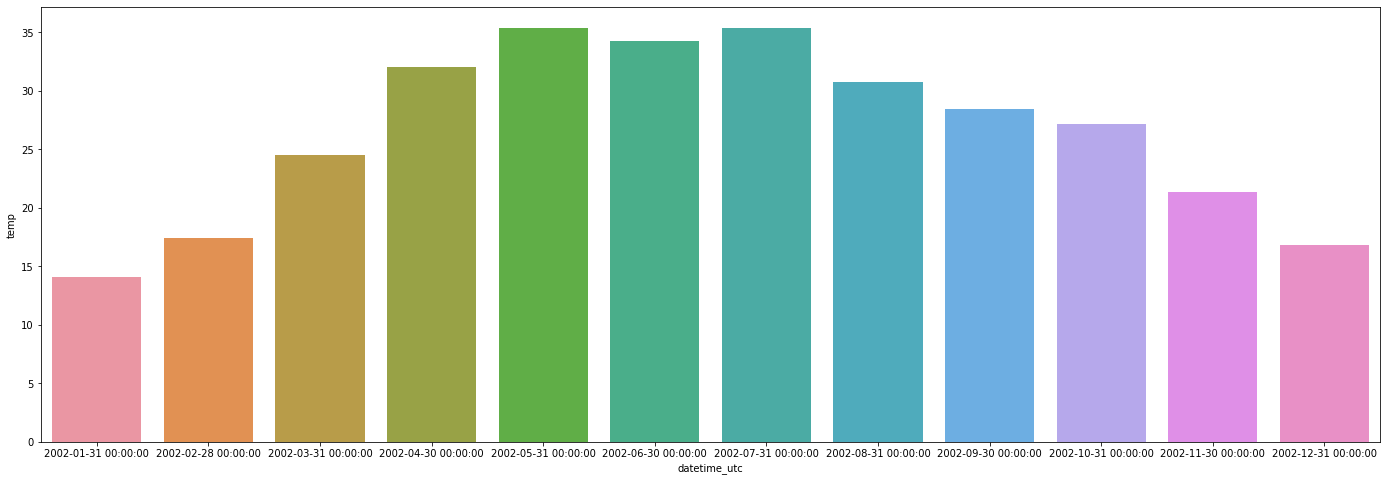

In [12]:
m = avg_month['2002-01-31':'2002-12-31'] # After slicing you can see spacific years
plt.figure(figsize= (24,8))
sns.barplot(x=m.index, y=m['temp'])

# Mean & Standered Deviation

In [13]:
mean=np.mean(data)   # Mean
print(mean)

25.451269475761833


In [14]:
std=np.std(data)    # Standered Deviation
print(std)

temp    8.482817
dtype: float64


# Average monthly temperature in Delhi from 1997 to 2016

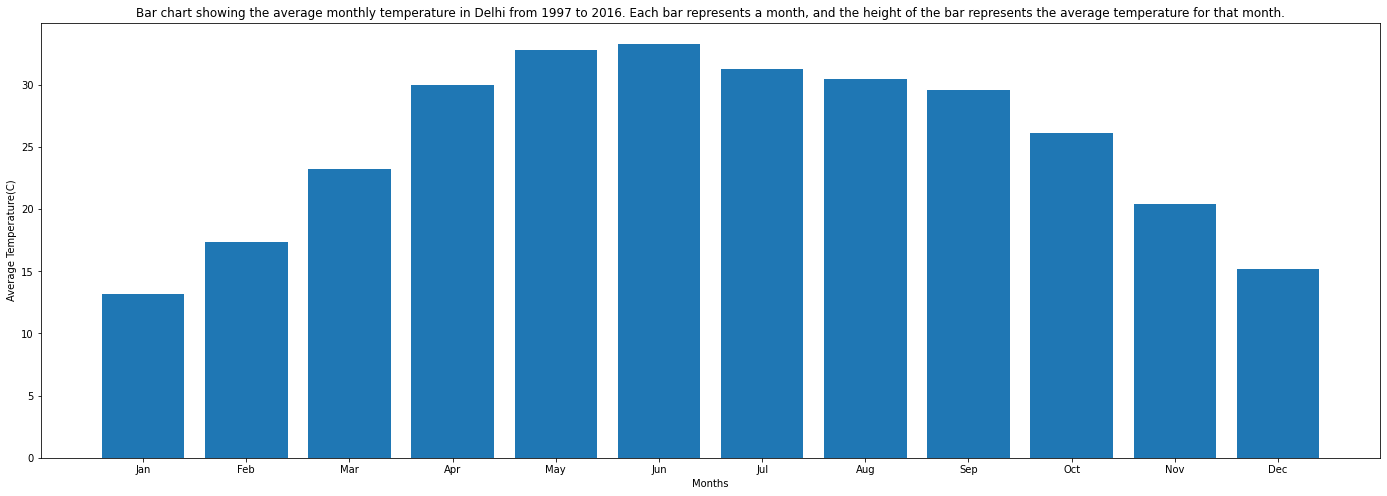

In [15]:
df = pd.read_csv("testset.csv")  # read data
df = pd.read_csv("testset.csv", parse_dates= ["datetime_utc"]) # Date formet
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp']) # taking date and time only
avg_month = data.resample('m').mean()


jan = avg_month['1997-01':'2016':12]
feb = avg_month['1997-02':'2016':12]
mar = avg_month['1997-03':'2016':12]
apr = avg_month['1997-04':'2016':12]
may = avg_month['1997-05':'2016':12]
jun = avg_month['1997-06':'2016':12]
jul = avg_month['1997-07':'2016':12]
aug = avg_month['1997-08':'2016':12]
sep = avg_month['1997-09':'2016':12]
oct_ = avg_month['1997-10':'2016':12]
nov = avg_month['1997-11':'2016':12]
dec = avg_month['1997-12':'2016':12]

A=np.mean(jan)
B=np.mean(feb)
C=np.mean(mar)
D=np.mean(apr)
E=np.mean(may)
F=np.mean(jun)
G=np.mean(jul)
H=np.mean(aug)
I=np.mean(sep)
J=np.mean(oct_)
K=np.mean(nov)
L=np.mean(dec)

data = np.vstack((A, B, C, D, E, F, G, H, I, J, K, L))
monthly_averages = np.mean(data, axis=1)  # Calculate the average of temperatures for each month

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(24, 8))
ax.bar(months, monthly_averages)

ax.set_xlabel('Months')
ax.set_ylabel('Average Temperature(C)')
ax.set_title('Bar chart showing the average monthly temperature in Delhi from 1997 to 2016. Each bar represents a month, and the height of the bar represents the average temperature for that month.')

plt.show()

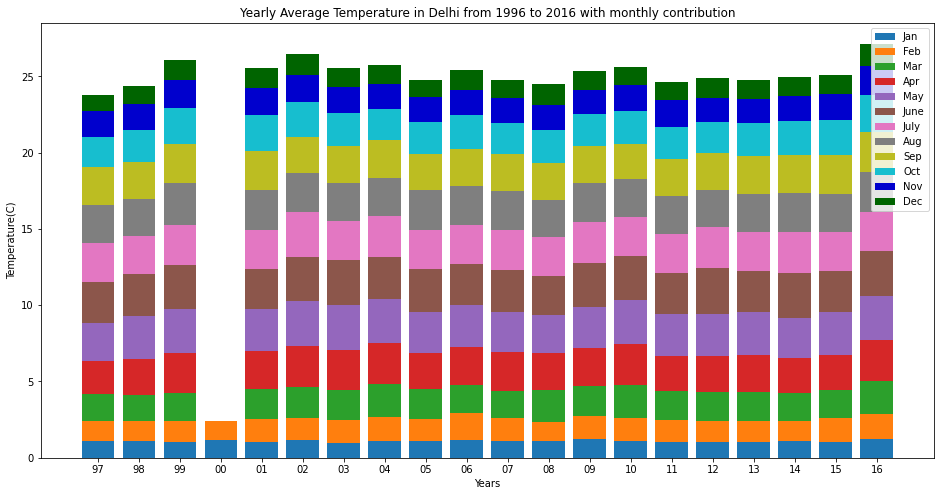

In [16]:
df = pd.read_csv("testset.csv")
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])
avg_month = data.resample('m').mean()

# we are interested in 1996 to 2016, so the years are changed accordingly
year = ['97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']

A = avg_month['1997-01':'2016-12':12]  # All Jan
B = avg_month['1997-02':'2016-12':12]  # All Feb
C = avg_month['1997-03':'2016-12':12]            # Data of march 2000 ts not available so after feb there graph
D = avg_month['1997-04':'2016-12':12]
E = avg_month['1997-05':'2016-12':12]
F = avg_month['1997-06':'2016-12':12]
G = avg_month['1997-07':'2016-12':12]
H = avg_month['1997-08':'2016-12':12]
I = avg_month['1997-09':'2016-12':12]
J = avg_month['1997-10':'2016-12':12]
K = avg_month['1997-11':'2016-12':12]  # All Nov
L = avg_month['1997-12':'2016-12':12]  # All Dec

a = A.temp
b = B.temp
c = C.temp
d = D.temp
e = E.temp
f = F.temp
g = G.temp
h = H.temp
o = I.temp
j = J.temp
k = K.temp
l = L.temp

data = np.vstack((a / 12, b / 12, c / 12, d / 12, e / 12, f / 12, g / 12, h / 12, o / 12, j / 12, k / 12, l / 12))

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'mediumblue', 'darkgreen']

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(year, data[0], color=colors[0], label=labels[0])
for i in range(1, len(data)):
    ax.bar(year, data[i], bottom=np.sum(data[:i], axis=0), color=colors[i], label=labels[i])

ax.set_xlabel('Years')
ax.set_ylabel('Temperature(C)')
ax.set_title('Yearly Average Temperature in Delhi from 1996 to 2016 with monthly contribution')
ax.legend()
plt.show()

# Temp v/s Days

<Axes: xlabel='datetime_utc', ylabel='temp'>

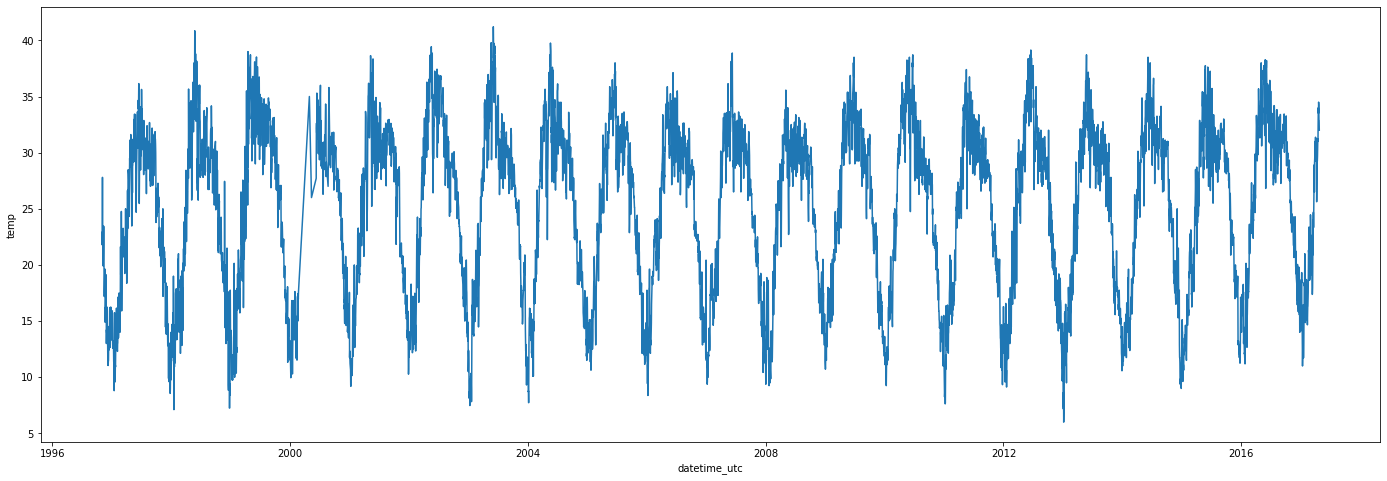

In [17]:
df = pd.read_csv("testset.csv")
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])
avg_day = data.resample('d').mean()
plt.figure(figsize= (24,8))
sns.lineplot(x=avg_day.index, y=avg_day['temp'])

<Axes: xlabel='datetime_utc', ylabel='temp'>

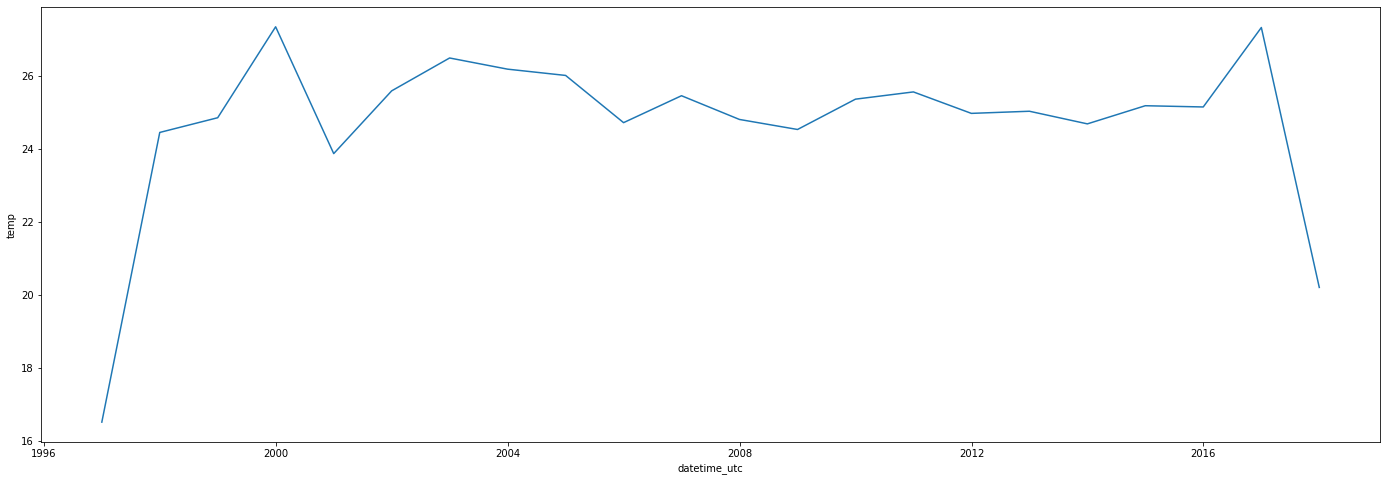

In [18]:
# In main data 1996 and 2017 whole month data is not collected so in lower code these years are removed
avg_year = data.resample('Y').mean()
plt.figure(figsize= (24,8))  
sns.lineplot(x=avg_year.index, y=avg_year['temp'])

<Axes: xlabel='datetime_utc', ylabel='temp'>

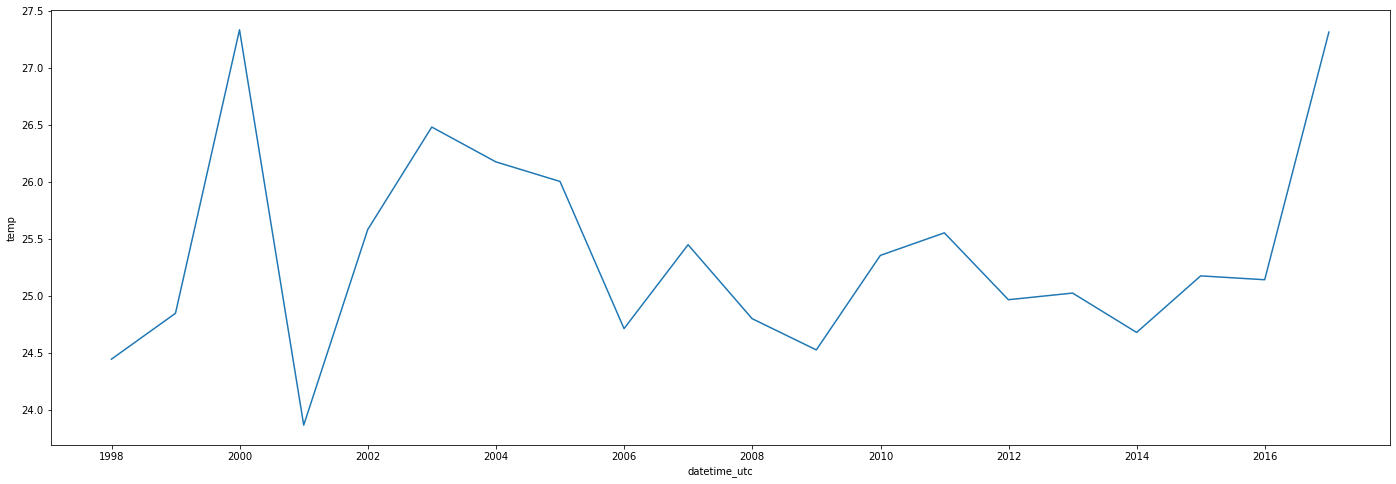

In [19]:
avg_year = avg_year['1997':'2016']  
plt.figure(figsize= (24,8))
sns.lineplot(x=avg_year.index, y=avg_year['temp'])

# Daily MAX, Daily Average, Daily MIN (TENPERATURE)

In [20]:
daily_max = data.resample('d').max()
daily_max.head(4)

,temp
datetime_utc,
1996-11-01,30.0
1996-11-02,31.0
1996-11-03,29.0
1996-11-04,29.0


In [21]:
daily_avg = data.resample('d').mean()
daily_avg.head(4)

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222


In [22]:
daily_min = data.resample('d').min()
daily_min.head(4)

,temp
datetime_utc,
1996-11-01,19.0
1996-11-02,17.0
1996-11-03,16.0
1996-11-04,15.0


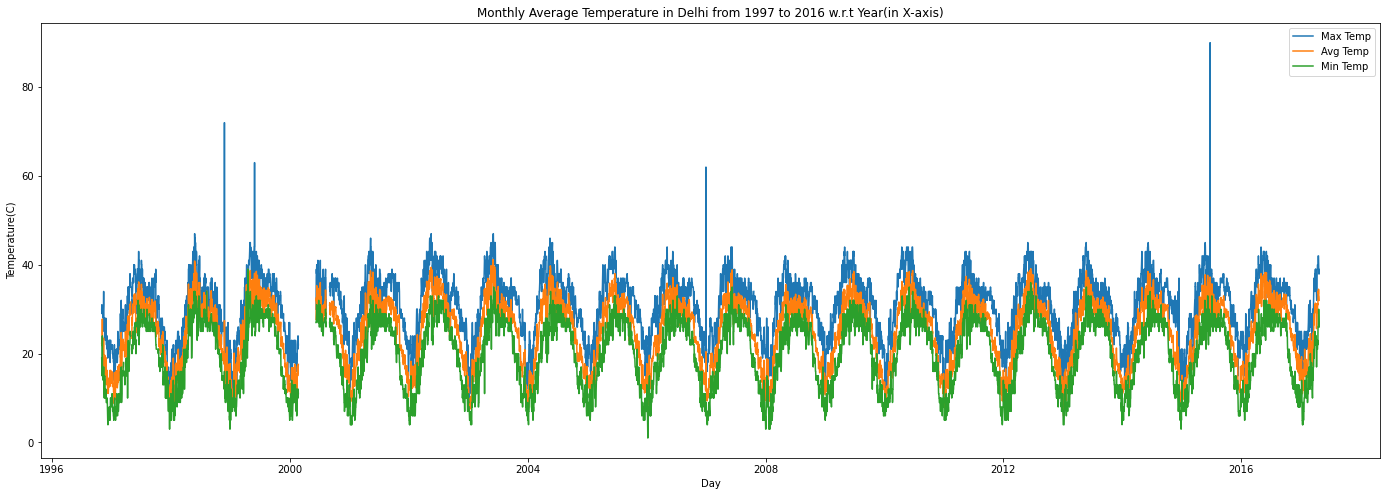

In [23]:
plt.figure(figsize=(24, 8))

plt.plot(daily_max.index, daily_max, label='Max Temp')
plt.plot(daily_avg.index, daily_avg, label='Avg Temp')
plt.plot(daily_min.index, daily_min, label='Min Temp')

# Labels and title
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Monthly Average Temperature in Delhi from 1997 to 2016 w.r.t Year(in X-axis)')
plt.legend()

# Heat_map of Average Tempearture of day in Delhi from 1996 to 2017

In [24]:
df = pd.read_csv('testset.csv') 
df.head (2)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [25]:
# a function to extract month part from the whole date
def get_month(x):
  return x[4:6]

In [26]:
# a function to extract day part from the whole date
def get_day(x):
  return x[6:8]

In [27]:
# making two new features month and day
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))
df['day'] = df['datetime_utc'].apply(lambda x: get_day(str(x)))
df['day']

0         01
1         01
2         01
3         01
4         01
          ..
100985    24
100986    24
100987    24
100988    24
100989    24
Name: day, Length: 100990, dtype: object

In [28]:
temp_month = pd.crosstab(df['month'], df['day'], values=df[' _tempm'], aggfunc='mean')
temp_day = pd.crosstab(df['day'], df['day'], values=df[' _tempm'], aggfunc='mean')

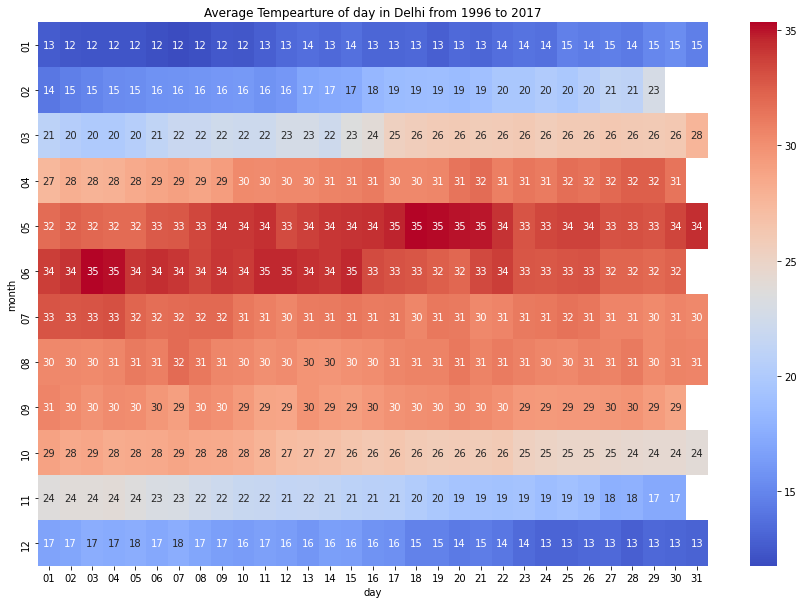

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_month, cmap='coolwarm', annot=True)
plt.title("Average Tempearture of day in Delhi from 1996 to 2017")
plt.show()

# Others

In [30]:
data.columns

Index(['temp'], dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    100317 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [32]:
4

4